In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay

In [6]:
df = pd.read_csv('train_transaction.csv', usecols=range(197))
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 197 entries, TransactionID to V142
dtypes: float64(179), int64(4), object(14)
memory usage: 887.6+ MB


In [8]:
df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V138              508595
V139              508595
V140              508595
V141              508595
V142              508595
Length: 197, dtype: int64

In [9]:
df['isFraud'].value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

In [10]:
df.shape

(590540, 197)

tập dữ liệu cần giảm chiều

In [12]:
data = df.fillna(0, inplace=True)
df.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142
0,2987000,0,86400,68.5,W,13926,0.0,150.0,discover,142.0,...,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,1404.0,790.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
non_numeric_columns = df.select_dtypes(include=['object']).columns 
print("Các cột chứa dữ liệu không phải là số (kiểu object):")
print(non_numeric_columns)

Các cột chứa dữ liệu không phải là số (kiểu object):
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')


tạo 1 dataframe để xử lý các dữ liệu object

In [22]:
# Tạo một DataFrame từ dữ liệu
columns_of_interest = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
data = pd.DataFrame()
for column in columns_of_interest:
    data[column] = df[column].sample(590540, random_state= 1).reset_index(drop= True)
    
data.fillna(0, inplace=True)

In [23]:
print(data)

       ProductCD       card4   card6  P_emaildomain  R_emaildomain M1 M2 M3  \
0              R        visa   debit      yahoo.com      yahoo.com  0  0  0   
1              W  mastercard   debit      gmail.com              0  0  0  0   
2              W        visa   debit              0              0  T  T  T   
3              W        visa  credit  anonymous.com              0  T  T  T   
4              W        visa   debit              0              0  T  T  T   
...          ...         ...     ...            ...            ... .. .. ..   
590535         W  mastercard   debit              0              0  T  T  T   
590536         R        visa  credit  anonymous.com  anonymous.com  0  0  0   
590537         W  mastercard   debit         me.com              0  T  T  T   
590538         W        visa   debit        aol.com              0  T  T  T   
590539         W  mastercard   debit              0              0  T  F  F   

        M4 M5 M6 M7 M8 M9  
0        0  0  0  0  0 

Sử dụng One-Hot Encoding cho các thuộc tính phân loại như Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

In [26]:
df_onehot_encoding = pd.get_dummies(data, columns=['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], drop_first=False)

In [27]:
df_onehot_encoding = df_onehot_encoding.astype(int)
print(df_onehot_encoding)

        ProductCD_C  ProductCD_H  ProductCD_R  ProductCD_S  ProductCD_W  \
0                 0            0            1            0            0   
1                 0            0            0            0            1   
2                 0            0            0            0            1   
3                 0            0            0            0            1   
4                 0            0            0            0            1   
...             ...          ...          ...          ...          ...   
590535            0            0            0            0            1   
590536            0            0            1            0            0   
590537            0            0            0            0            1   
590538            0            0            0            0            1   
590539            0            0            0            0            1   

        card4_0  card4_american express  card4_discover  card4_mastercard  \
0             0       

xóa bỏ các cột dữ liệu object sau khi đã sử lý one_hot encoding các cột đó

In [28]:
drop_after_view = df.drop(columns=['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], axis= 1)
drop_after_view.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142
0,2987000,0,86400,68.5,13926,0.0,150.0,142.0,315.0,87.0,...,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,1404.0,790.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,5937,555.0,150.0,226.0,272.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2987006,0,86522,159.0,12308,360.0,150.0,166.0,126.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2987007,0,86529,422.5,12695,490.0,150.0,226.0,325.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2987008,0,86535,15.0,2803,100.0,150.0,226.0,337.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,17399,111.0,150.0,224.0,204.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


nối bảng dữ liệu ban đầu và dữ liệu sau khi đã xử lý one_hot encoding

In [29]:
df_concat_view = pd.concat([drop_after_view, df_onehot_encoding], axis= 1)
print(df_concat_view)

        TransactionID  isFraud  TransactionDT  TransactionAmt  card1  card2  \
0             2987000        0          86400           68.50  13926    0.0   
1             2987001        0          86401           29.00   2755  404.0   
2             2987002        0          86469           59.00   4663  490.0   
3             2987003        0          86499           50.00  18132  567.0   
4             2987004        0          86506           50.00   4497  514.0   
...               ...      ...            ...             ...    ...    ...   
590535        3577535        0       15811047           49.00   6550    0.0   
590536        3577536        0       15811049           39.50  10444  225.0   
590537        3577537        0       15811079           30.95  12037  595.0   
590538        3577538        0       15811088          117.00   7826  481.0   
590539        3577539        0       15811131          279.95  15066  170.0   

        card3  card5  addr1  addr2  ...  M6_T  M7_0

In [30]:
df_concat_view.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,M6_T,M7_0,M7_F,M7_T,M8_0,M8_F,M8_T,M9_0,M9_F,M9_T
0,2987000,0,86400,68.5,13926,0.0,150.0,142.0,315.0,87.0,...,0,1,0,0,1,0,0,1,0,0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,1,1,0,0,1,0,0,1,0,0
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,0,0,1,0,0,1,0,0,0,1
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,0,0,0,1,0,0,1,0,0,1
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0,1,0,0,1,0,0,1,0,0
5,2987005,0,86510,49.0,5937,555.0,150.0,226.0,272.0,87.0,...,0,0,0,1,0,0,1,0,0,1
6,2987006,0,86522,159.0,12308,360.0,150.0,166.0,126.0,87.0,...,0,1,0,0,1,0,0,1,0,0
7,2987007,0,86529,422.5,12695,490.0,150.0,226.0,325.0,87.0,...,0,1,0,0,1,0,0,1,0,0
8,2987008,0,86535,15.0,2803,100.0,150.0,226.0,337.0,87.0,...,1,1,0,0,1,0,0,1,0,0
9,2987009,0,86536,117.0,17399,111.0,150.0,224.0,204.0,87.0,...,0,1,0,0,1,0,0,1,0,0


Chuẩn hóa dữ liệu

Các giá trị số cần được chuẩn hóa bằng cách trừ đi giá trị trung bình và chia cho độ lệch chuẩn để tất cả các thuộc tính có cùng thang đo

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_concat_view)

In [35]:
# Chuyển X_scaled thành DataFrame để dễ hiển thị
X_scaled_df = pd.DataFrame(X_scaled, columns=df_concat_view.columns)

In [36]:
print(X_scaled_df.head(10))

   TransactionID   isFraud  TransactionDT  TransactionAmt     card1     card2  \
0      -1.732048 -0.190417      -1.577987       -0.278167  0.821695 -2.194286   
1      -1.732042 -0.190417      -1.577986       -0.443327 -1.457558  0.288389   
2      -1.732036 -0.190417      -1.577972       -0.317889 -1.068263  0.816879   
3      -1.732030 -0.190417      -1.577965       -0.355521  1.679858  1.290062   
4      -1.732024 -0.190417      -1.577964       -0.355521 -1.102133  0.964364   
5      -1.732019 -0.190417      -1.577963       -0.359702 -0.808325  1.216319   
6      -1.732013 -0.190417      -1.577960        0.100237  0.491570  0.017998   
7      -1.732007 -0.190417      -1.577959        1.201999  0.570531  0.816879   
8      -1.732001 -0.190417      -1.577957       -0.501865 -1.447765 -1.579762   
9      -1.731995 -0.190417      -1.577957       -0.075376  1.530302 -1.512165   

      card3     card5     addr1     addr2  ...      M6_T      M7_0      M7_F  \
0 -0.202222 -1.257118  0.427

In [37]:
y = df['isFraud']

In [58]:
# các tham số trong PCA
pca = PCA(n_components=None, whiten=False, svd_solver='randomized', iterated_power=5, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [59]:
# Hiển thị trị riêng (explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [60]:
# Hiển thị vector riêng (Eigenvectors)
print("\nVector riêng (Eigenvectors):")
eigenvectors = pca.components_
print(eigenvectors)


Vector riêng (Eigenvectors):
[[-8.26925685e-03  3.06859909e-02 -8.47303427e-03 ...  5.73709181e-05
  -2.61805189e-05 -4.57188365e-05]
 [ 5.79011658e-02 -3.38488454e-05  5.63871377e-02 ...  5.80641330e-04
  -2.68753266e-04 -4.60748324e-04]
 [ 3.28878230e-02 -6.28985702e-04  3.32961029e-02 ... -1.77402018e-03
  -4.34619477e-04  2.05944633e-03]
 ...
 [ 0.00000000e+00  5.54821952e-18 -2.98238289e-18 ... -6.61580434e-04
   1.43443487e-12  2.76372078e-12]
 [-0.00000000e+00  1.28594535e-17 -4.80876829e-19 ...  4.08990843e-04
  -3.85823190e-13 -7.43444444e-13]
 [ 0.00000000e+00  4.39067130e-17 -6.88251361e-19 ...  9.15681958e-04
  -8.24085199e-14 -1.58805578e-13]]


In [61]:
eigenvectors_df = pd.DataFrame(eigenvectors, columns=df_concat_view.columns[:len(explained_variance)])

In [62]:
# Tạo DataFrame cho vector riêng để hiển thị dễ hiểu hơn
eigenvalues_df = pd.DataFrame(explained_variance, columns=['Eigenvalue'])

In [63]:
eigenvalues_df['Component'] = eigenvalues_df.index + 1

In [64]:
# Hiển thị cả vector riêng và giá trị riêng
combined_df = pd.concat([eigenvalues_df, eigenvectors_df], axis=1)
print("\nCombined Eigenvalues and Eigenvectors:")
print(combined_df)


Combined Eigenvalues and Eigenvectors:
       Eigenvalue  Component  TransactionID       isFraud  TransactionDT  \
0    1.030559e-01          1      -0.008269  3.068599e-02  -8.473034e-03   
1    6.383202e-02          2       0.057901 -3.384885e-05   5.638714e-02   
2    4.563586e-02          3       0.032888 -6.289857e-04   3.329610e-02   
3    3.747708e-02          4       0.000925 -3.634517e-04   9.534929e-04   
4    2.966342e-02          5      -0.015754  3.062655e-03  -1.450260e-02   
..            ...        ...            ...           ...            ...   
342  5.390967e-34        343       0.000000 -3.643328e-17  -1.243087e-16   
343  5.390967e-34        344      -0.000000 -5.960004e-17  -1.163539e-18   
344  5.390967e-34        345       0.000000  5.548220e-18  -2.982383e-18   
345  5.390967e-34        346      -0.000000  1.285945e-17  -4.808768e-19   
346  5.390967e-34        347       0.000000  4.390671e-17  -6.882514e-19   

     TransactionAmt         card1         card2

In [65]:
print("Trị riêng (Explained Variance Ratio):")
print(explained_variance)

Trị riêng (Explained Variance Ratio):
[1.03055914e-01 6.38320162e-02 4.56358557e-02 3.74770846e-02
 2.96634196e-02 2.48754226e-02 2.06229307e-02 1.43366498e-02
 1.25538678e-02 1.07768804e-02 1.07542087e-02 1.01951637e-02
 9.38360840e-03 8.85684567e-03 8.11842174e-03 7.28204763e-03
 7.15983227e-03 6.75403214e-03 6.73075225e-03 6.46781210e-03
 6.31259451e-03 5.93476407e-03 5.83185574e-03 5.79885268e-03
 5.76847272e-03 5.76332583e-03 5.74518911e-03 5.74389433e-03
 5.74184118e-03 5.73781961e-03 5.73694280e-03 5.72477142e-03
 5.70378330e-03 5.68228917e-03 5.66673217e-03 5.64104566e-03
 5.63162648e-03 5.57781531e-03 5.54382647e-03 5.35419990e-03
 5.21528333e-03 5.18954188e-03 5.03905647e-03 4.87593333e-03
 4.74563572e-03 4.71301912e-03 4.70538201e-03 4.56625460e-03
 4.52873113e-03 4.44854957e-03 4.40203693e-03 4.08344282e-03
 4.04098063e-03 4.03222232e-03 3.86532273e-03 3.83364481e-03
 3.82167782e-03 3.78703348e-03 3.73858889e-03 3.70927377e-03
 3.69019696e-03 3.66260449e-03 3.63324266e-03 3

In [66]:
print("\nPhương sai tích lũy:")
print(cumulative_variance)


Phương sai tích lũy:
[0.10305591 0.16688793 0.21252379 0.25000087 0.27966429 0.30453971
 0.32516264 0.33949929 0.35205316 0.36283004 0.37358425 0.38377941
 0.39316302 0.40201987 0.41013829 0.41742034 0.42458017 0.4313342
 0.43806495 0.44453277 0.45084536 0.45678012 0.46261198 0.46841083
 0.47417931 0.47994263 0.48568782 0.49143171 0.49717356 0.50291138
 0.50864832 0.51437309 0.52007687 0.52575916 0.53142589 0.53706694
 0.54269857 0.54827638 0.55382021 0.55917441 0.56438969 0.56957923
 0.57461829 0.57949422 0.58423986 0.58895288 0.59365826 0.59822451
 0.60275325 0.6072018  0.61160383 0.61568728 0.61972826 0.62376048
 0.6276258  0.63145945 0.63528112 0.63906816 0.64280675 0.64651602
 0.65020622 0.65386882 0.65750206 0.66112668 0.6647323  0.66829851
 0.67185581 0.67540358 0.67894923 0.68248273 0.68601003 0.68952395
 0.69302244 0.69649982 0.69995414 0.70338755 0.70681483 0.71023741
 0.71364755 0.71704332 0.72040789 0.72376518 0.72710938 0.73043428
 0.73374762 0.73703979 0.74031359 0.74358

In [67]:
score_mean_cumulate_varienca = cumulative_variance.mean()
print(score_mean_cumulate_varienca)

0.8479035186620667


In [68]:
print(f"\nSố lượng thành phần chính nên giữ lại (khi tổng phương sai đạt >= 85%): {sum(cumulative_variance <= 0.85) + 1}")


Số lượng thành phần chính nên giữ lại (khi tổng phương sai đạt >= 85%): 126


biểu đồ Scree Plot

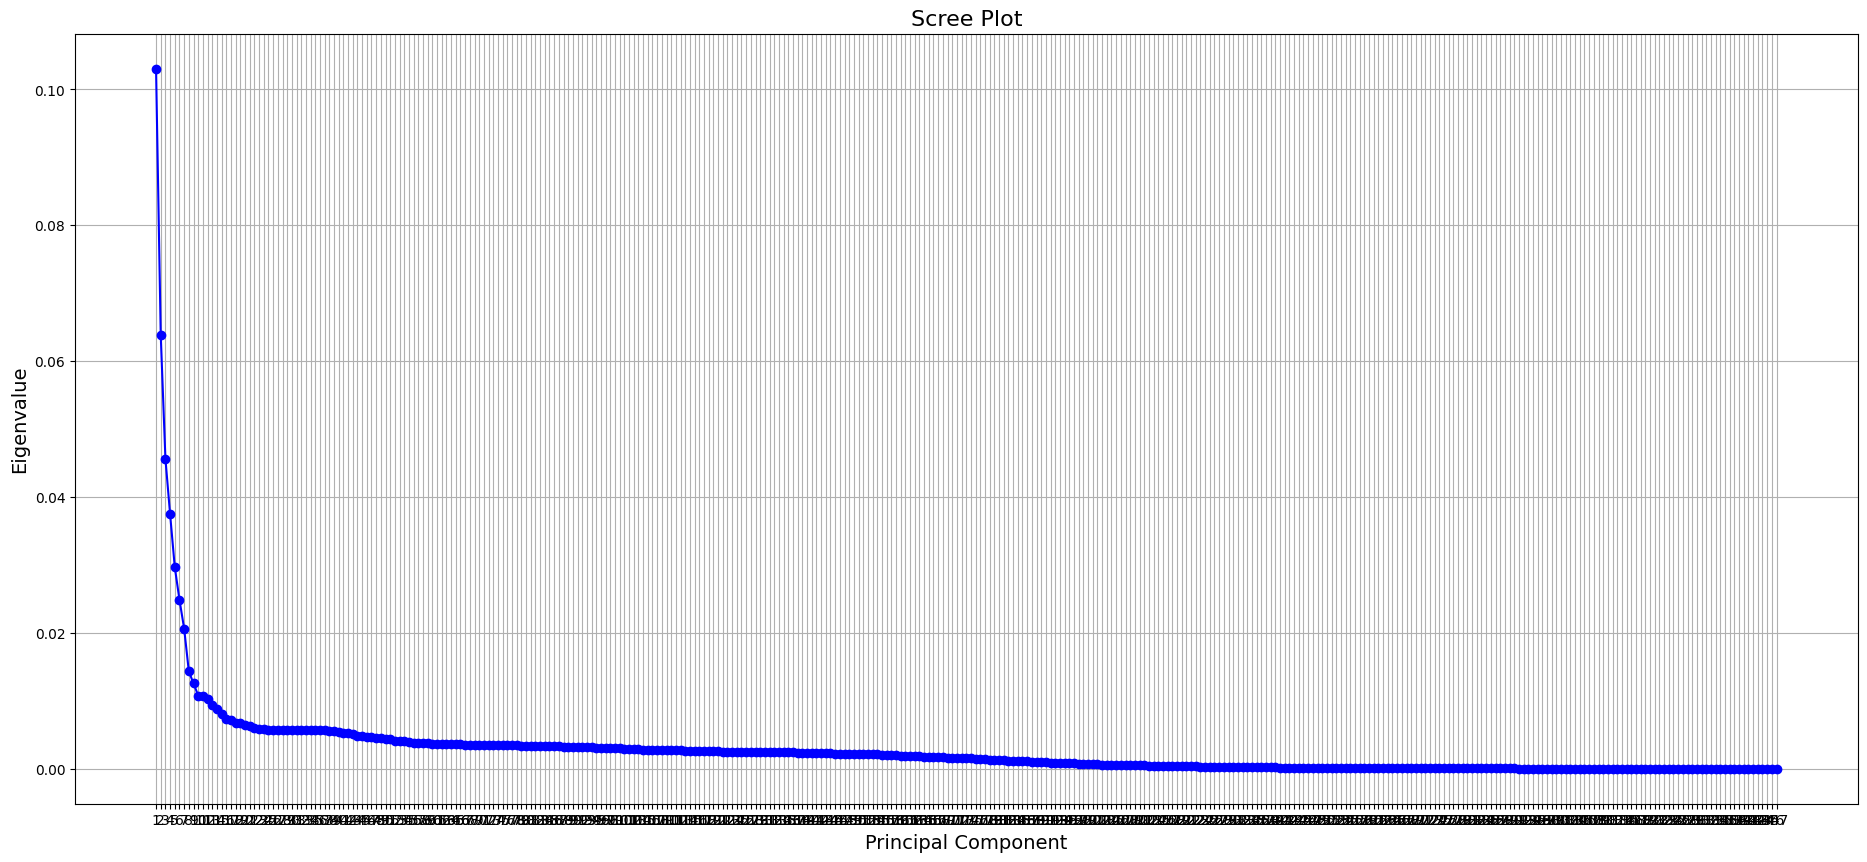

In [80]:
# Vẽ biểu đồ Scree Plot
plt.figure(figsize=(23, 10))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'o-', color='b')
plt.title('Scree Plot', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

In [70]:
# Hiển thị dữ liệu sau khi giảm chiều
print("Dữ liệu sau khi giảm chiều PCA:")
print(X_pca)

Dữ liệu sau khi giảm chiều PCA:
[[-2.69452391e+00 -2.40449235e-01 -3.03378297e-01 ...  1.28189646e-14
  -3.89518244e-14  6.80126905e-14]
 [ 1.25443529e-02 -1.38428322e+00 -7.51597632e-01 ...  2.91211752e-14
   4.97270481e-14  3.28193159e-14]
 [-2.49506482e+00  2.50468263e+00 -1.35256075e-01 ... -2.44830118e-14
  -2.38008182e-14 -1.65502793e-14]
 ...
 [-3.41733133e+00  4.24862335e+00  1.12482393e-01 ...  5.07975987e-17
   4.78504121e-17  5.92382941e-17]
 [-1.27723438e+00  5.12286335e+00  7.18334505e-01 ... -1.91833814e-16
   6.73741401e-17 -4.11262622e-17]
 [-3.88492114e+00  6.86671422e+00  1.47139716e+00 ... -1.15770083e-16
   5.37592463e-17  2.42983730e-17]]


In [72]:
components_df = pd.DataFrame(pca.components_, columns=df_concat_view.columns)

In [73]:
print("\nCác thành phần chính với trọng số thuộc tính tương ứng:")
print(components_df)


Các thành phần chính với trọng số thuộc tính tương ứng:
     TransactionID       isFraud  TransactionDT  TransactionAmt         card1  \
0        -0.008269  3.068599e-02  -8.473034e-03   -2.322437e-02  1.008701e-03   
1         0.057901 -3.384885e-05   5.638714e-02    1.171964e-02  5.712360e-04   
2         0.032888 -6.289857e-04   3.329610e-02    7.939135e-03  1.368241e-02   
3         0.000925 -3.634517e-04   9.534929e-04    1.037930e-03 -4.720851e-04   
4        -0.015754  3.062655e-03  -1.450260e-02   -2.604443e-03  2.167512e-03   
..             ...           ...            ...             ...           ...   
342       0.000000 -3.643328e-17  -1.243087e-16   -7.441250e-17  8.222800e-18   
343      -0.000000 -5.960004e-17  -1.163539e-18    8.535468e-18  6.563731e-17   
344       0.000000  5.548220e-18  -2.982383e-18    4.997556e-18 -1.297215e-17   
345      -0.000000  1.285945e-17  -4.808768e-19   -1.199033e-17  3.058146e-17   
346       0.000000  4.390671e-17  -6.882514e-19   -7

# Xác định các thuộc tính nào được giữ lại dựa trên trọng số

In [74]:
threshold = 0.2
important_features = np.abs(components_df) > threshold

In [76]:
n_components = pca.n_components_
print("\nCác thuộc tính quan trọng được giữ lại cho từng thành phần PCA:")
for i in range(n_components):
    print(f"Component {i+1}: {df_concat_view.columns[important_features.iloc[i]]}")


Các thuộc tính quan trọng được giữ lại cho từng thành phần PCA:
Component 1: Index([], dtype='object')
Component 2: Index([], dtype='object')
Component 3: Index(['V95', 'V96', 'V97', 'V101', 'V102', 'V103', 'V105', 'V106', 'V126',
       'V127', 'V128', 'V132', 'V133', 'V134'],
      dtype='object')
Component 4: Index(['ProductCD_W', 'R_emaildomain_0', 'M1_0', 'M1_T', 'M2_0', 'M2_T',
       'M3_0', 'M3_T', 'M6_0', 'M7_0', 'M7_F', 'M8_0', 'M9_0', 'M9_T'],
      dtype='object')
Component 5: Index(['C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14'], dtype='object')
Component 6: Index(['V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116',
       'V117', 'V119', 'V120', 'V122', 'V123'],
      dtype='object')
Component 7: Index(['V29', 'V30', 'V48', 'V49', 'V69', 'V70', 'V90', 'V91'], dtype='object')
Component 8: Index(['V1', 'V2', 'V3', 'V6', 'V7', 'V8', 'V9'], dtype='object')
Component 9: Index(['D1', 'D2', 'D10', 'D11', 'D15'], dtype='object')
Compon

Trực quan hóa PCA

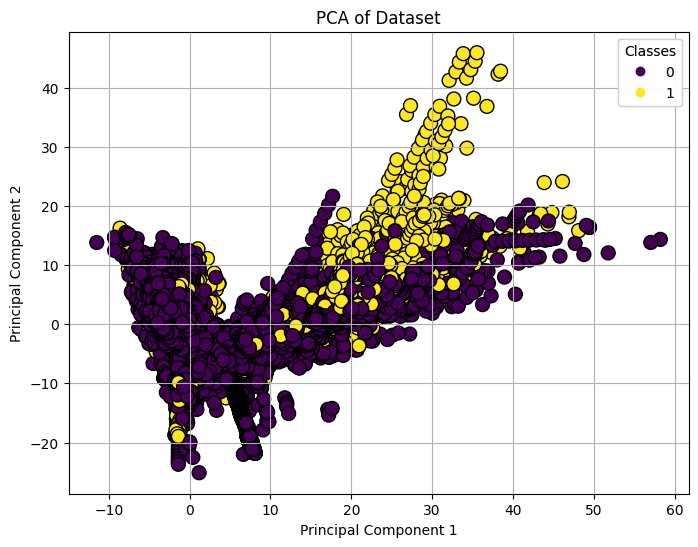

In [71]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Thêm legend
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)
plt.grid()
plt.show()